In [29]:
# number of E and P elts in the universe
var('UN,UP')
UN=4; UP=2

In [39]:
Crg = PolynomialRing(RationalField(),
                     ['r%s'%i for i in range(1, UN+1)] + ['g%s'%i for i in range(1, UN+1)])
Crg.inject_variables()


#CrgF=Crg.fraction_field()
#CrgF.inject_variables()
#THIS FAILS WHEN WE TRY TO MULTIPLY AN EXTERIOR ALG ELE BY A POLY. GENERATOR

Ext=\
    ExteriorAlgebra(Crg,\
        ['p%s'%i  for i in range(1, UP+1)]+\
        ['pa%s'%i for i in range(1, UP+1)]+\
        ['pb%s'%i for i in range(1, UP+1)]+\
        ['e%s'%i  for i in range(1, UN+1)])
Ext.inject_variables() 

Rrrs=[Crg.gen(i)    for i in range(0, UN)]
Gees=[Crg.gen(i)    for i in range(UN, 2*UN)]
Pees=[Ext.gen(i)    for i in range(0, UP)]
Paas=[Ext.gen(i)    for i in range(UP, 2*UP)]
Pbes=[Ext.gen(i)    for i in range(2*UP, 3*UP)]
Eees=[Ext.gen(i)    for i in range(3*UP, 3*UP+UN)]

NSeq=Pees+Eees
PEVol=prod(NSeq)
EVol=prod(Eees)


diagRrrs=diagonal_matrix(Rrrs)
diagGees=diagonal_matrix(Gees)

matII=block_matrix([[matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [identity_matrix(UP),matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],       
                    [matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UN,UP)      ,matrix(UN,UP) ,matrix(UN,UP),diagGees     ]
                   ])
matVV=block_matrix([[matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UP)         ,matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],       
                    [identity_matrix(UP),matrix(UP)    ,matrix(UP)   ,matrix(UP,UN)],
                    [matrix(UN,UP)      ,matrix(UN,UP) ,matrix(UN,UP),diagRrrs     ]
                   ])

II=Ext.lift_module_morphism(matII)
VV=Ext.lift_module_morphism(matVV)


Defining r1, r2, r3, r4, g1, g2, g3, g4
Defining p1, p2, pa1, pa2, pb1, pb2, e1, e2, e3, e4


In [40]:
#Exterior Algebra operations only
#Exterior Algebra with ground set operations are defined later.


def contract(X,E):
    #only contract by monomials
    #Is used to implement LvSE and LhSE contraction where the ground set is Palpha+Pbeta+E
    assert (E.length()==1)
    return (X.interior_product(E)*(-1)^(E.degree()*(X.degree()-E.degree())))

def delete(X,e):
    #the subtraction formula only works for vectors.
    assert (e.degree()==1 & e.length()==1)
    return (X - contract(X,e)*e)

def delete_contract(X,e):
    #only contract by monomials
    assert (e.degree()==1 & e.length()==1)
    contr = X.interior_product(e)*(-1)^(e.degree()*(X.degree()-e.degree()))
    dele = X - contr*e
    return (dele, contr)

def perp(VOL,N):
    return (VOL.interior_product(N))

In [41]:
#Exterior algebra elements with ground sequenced ground set
class ExtS:
    def __init__(this, extN, seqS):
        this.extN = extN
        this.seqS = copy(seqS)
        this._set_VOL()      
    
    def contraction(this,e):
        #does only one
        assert (e.length()==1 & e.degree()==1)
        result = this._copy_remove(e)
        result.extN = contract(result.extN,e)
        return (result)
    def deletion(this,e):
        #does only one
        assert (e.length()==1 & e.degree()==1)  
        result = this._copy_remove(e)
        result.extN = delete(result.extN,e)
        return (result)
    def perp(this):
        result=this._copy()
        result.extN = perp(this.VOL, this.extN)
        return (result)
    
    def printme(this):
        print("element:",this.extN)
        print("set orientation:",this.seqS)
        print("Volume:",this.VOL)
        
    def _set_VOL(this):
        acc = 1
        for v in this.seqS:
            acc = acc*v
        this.VOL = acc
    def _copy(this):
        return ExtS(this.extN, this.seqS)    
    def _copy_remove(this,e):
        result = this._copy()
        result.seqS.remove(e)
        result._set_VOL()
        return(result)



In [42]:
#
# Supply explicit matrices
#

UR=3

NalphaMat = matrix(3,UN+UP,
    [[ 1, 0, -1,  0,  1,   0],
     [-1,  0,  0, -1,  0, -1],
     [ 0,  1,  1,  1,  0,  0]
    ])

NbetaMat=copy(NalphaMat)

print("NalphaMat=\n",NalphaMat,"\nNbetaMat=\n",NbetaMat)


NalphaMat=
 [ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0] 
NbetaMat=
 [ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0]


In [44]:
def ExtFromMatrix(NMat):
    ExtCol=NMat*(matrix([NSeq]).transpose())
    ExtRes=1
    for i in range(0,ExtCol.nrows()):
        ExtRes=ExtRes*ExtCol[i,0]
    return ExtRes

ExtNalpha=ExtFromMatrix(NalphaMat)
ExtNbeta =ExtFromMatrix(NbetaMat)
        
ExtNalphaMat=NalphaMat  * (matrix([Pees+Eees]).transpose())
print("ExtNalphaMat:\n",ExtNalphaMat)
ExtNbetaMat =NbetaMat * (matrix([Pees+Eees]).transpose())
print("\nExtNbetaMat:\n",ExtNbetaMat)

ExtNbetaPerp=perp(PEVol,ExtNbeta)
print("\nExtNbetaPerp:\n",ExtNbetaPerp)


#print("\n",ExtNalpha,"\n",ExtNbeta,"\n",ExtNbetaPerp)


ExtNalphaMat:
 [ p1 - e1 + e3]
[-p1 - e2 - e4]
[ p2 + e1 + e2]

ExtNbetaMat:
 [ p1 - e1 + e3]
[-p1 - e2 - e4]
[ p2 + e1 + e2]

ExtNbetaPerp:
 p1*p2*e1 - p1*p2*e2 + p1*p2*e3 + p1*p2*e4 + p1*e1*e2 - p1*e1*e4 - p1*e2*e3 - p1*e3*e4 - p2*e1*e3 - p2*e1*e4 + p2*e2*e3 + p2*e2*e4 - e1*e2*e3 - e1*e2*e4 - e1*e3*e4 + e2*e3*e4


In [45]:
GREAT=contract(II(ExtNalpha)*VV(ExtNbetaPerp),e1*e2*e3*e4)

In [11]:
seqSalpha=list(ExtNalpha.parent().gens()[0:UP]+ExtNalpha.parent().gens()[3*UP:3*UP+UN])
ExtSNalpha=ExtS(ExtNalpha,seqSalpha)
seqSbeta=list(ExtNbeta.parent().gens()[0:UP]+ExtNbeta.parent().gens()[3*UP:3*UP+UN])
ExtSNbeta=ExtS(ExtNbeta,seqSbeta)
ExtSNalpha.printme()
ExtSNbeta.printme()
ExtSNalpha.VOL==ExtSNbeta.VOL

element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4
element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


True

In [13]:
def LvS(ExtStop,ExtSbot):
    assert ((ExtStop.extN.parent()==ExtSbot.extN.parent()) & 
            (ExtStop.seqS==ExtSbot.seqS))
    newSeq=list(ExtStop.extN.parent().gens()[UP:3*UP])+ExtStop.seqS[UP:]
    newExt=II(ExtStop.extN)*VV(ExtSbot.extN)
    return ExtS(newExt,newSeq)
def LvSE(ExtStop,ExtSbot):
    LvSret=LvS(ExtStop,ExtSbot)
    ESeq=list(ExtStop.seqS[UP:])
    PaPbSeq=list(ExtStop.extN.parent().gens()[UP:3*UP])
    EE=1
    for v in ESeq:
        EE=EE*v
    newExt=contract(LvSret.extN,EE)
    return( ExtS(newExt,PaPbSeq))
def LhS(Extleft,Extright):
    return LvS(Extleft,Extright.perp())
def LhSE(Extleft,Extright):
    return LvSE(Extleft,Extright.perp())

In [15]:
HAPPYMAYBE=LvSE(ExtSNalpha,ExtSNbeta.perp())
HAPPYMAYBE.printme()
HAPPYTWO=LhSE(ExtSNalpha,ExtSNbeta)
HAPPYTWO.printme()

element: (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2
element: (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa2*pb2 + (r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2


In [16]:
ExtSNalpha.printme()

element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


In [17]:
dele1=ExtSNalpha.deletion(e1)
dele1.printme()
print()
cont1=ExtSNalpha.contraction(e1)
cont1.printme()
print()
termc=LhSE(cont1,cont1)
termc.printme()
print()
termd=LhSE(dele1,dele1)
termd.printme()
print()
TEST=termc.extN*g1+termd.extN*r1
print(TEST)

element: p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e2*e3 + p1*e2*e4 + p2*e2*e3 - p2*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e2, e3, e4]
Volume: p1*p2*e2*e3*e4

element: p1*p2 + p1*e3 - p1*e4 - p2*e2 - p2*e4 + e2*e3 - e2*e4 - e3*e4
set orientation: [p1, p2, e2, e3, e4]
Volume: p1*p2*e2*e3*e4

element: r2*r3*r4*pa1*pa2 - r2*r3*g4*pa1*pb1 + (r2*r4*g3 + r2*r3*g4)*pa1*pb2 + (-r3*r4*g2 - r2*r3*g4)*pa2*pb1 + r2*r3*g4*pa2*pb2 + (r4*g2*g3 + r3*g2*g4 + r2*g3*g4)*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2

element: (r3*r4*g2 + r2*r4*g3 + r2*r3*g4)*pa1*pa2 + r4*g2*g3*pa1*pb1 + (r4*g2*g3 + r3*g2*g4)*pa1*pb2 + (-r4*g2*g3 - r2*g3*g4)*pa2*pb1 - r4*g2*g3*pa2*pb2 + g2*g3*g4*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2

(r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (-r

In [18]:
tmp2=ExtSNalpha.contraction(e1)
tmp2.printme()

element: p1*p2 + p1*e3 - p1*e4 - p2*e2 - p2*e4 + e2*e3 - e2*e4 - e3*e4
set orientation: [p1, p2, e2, e3, e4]
Volume: p1*p2*e2*e3*e4


In [19]:
tmp3=tmp2.perp()
tmp3.printme()

element: -p1*p2*e2 + p1*p2*e3 + p1*p2*e4 - p1*e2*e3 - p1*e3*e4 + p2*e2*e3 + p2*e2*e4 + e2*e3*e4
set orientation: [p1, p2, e2, e3, e4]
Volume: p1*p2*e2*e3*e4


In [20]:
tmp4=LvS(tmp2,tmp3)
tmp4.printme()
tmp5=LvSE(tmp2,tmp3)
tmp5.printme()

element: -r2*pa1*pa2*pb1*pb2*e2 + r3*pa1*pa2*pb1*pb2*e3 + r4*pa1*pa2*pb1*pb2*e4 - r2*r3*pa1*pa2*pb1*e2*e3 - r3*r4*pa1*pa2*pb1*e3*e4 + r2*r3*pa1*pa2*pb2*e2*e3 + r2*r4*pa1*pa2*pb2*e2*e4 + r2*r3*r4*pa1*pa2*e2*e3*e4 + r2*g3*pa1*pb1*pb2*e2*e3 - r2*g4*pa1*pb1*pb2*e2*e4 + (r4*g3 + r3*g4)*pa1*pb1*pb2*e3*e4 - r2*r3*g4*pa1*pb1*e2*e3*e4 + (r2*r4*g3 + r2*r3*g4)*pa1*pb2*e2*e3*e4 - r3*g2*pa2*pb1*pb2*e2*e3 + (-r4*g2 - r2*g4)*pa2*pb1*pb2*e2*e4 + r3*g4*pa2*pb1*pb2*e3*e4 + (-r3*r4*g2 - r2*r3*g4)*pa2*pb1*e2*e3*e4 + r2*r3*g4*pa2*pb2*e2*e3*e4 + (r4*g2*g3 + r3*g2*g4 + r2*g3*g4)*pb1*pb2*e2*e3*e4
set orientation: [pa1, pa2, pb1, pb2, e2, e3, e4]
Volume: pa1*pa2*pb1*pb2*e2*e3*e4
element: r2*r3*r4*pa1*pa2 - r2*r3*g4*pa1*pb1 + (r2*r4*g3 + r2*r3*g4)*pa1*pb2 + (-r3*r4*g2 - r2*r3*g4)*pa2*pb1 + r2*r3*g4*pa2*pb2 + (r4*g2*g3 + r3*g2*g4 + r2*g3*g4)*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2


In [21]:
Ce1=ExtSNalpha.contraction(e2)
De1=ExtSNalpha.deletion(e2)
Ce1.printme()
De1.printme()


Cresult=LhSE(Ce1,Ce1)
Dresult=LhSE(De1,De1)

#De1.printme()

print("\n\n")
Cresult.printme()
print("\n\n")
Dresult.printme()




TRY=g2*Cresult.extN+r2*Dresult.extN
print(TRY)

element: p1*p2 + p1*e3 - p1*e4 + p2*e1 - p2*e3 - e1*e3 + e1*e4 - e3*e4
set orientation: [p1, p2, e1, e3, e4]
Volume: p1*p2*e1*e3*e4
element: p1*p2*e1 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 + p2*e1*e4 - p2*e3*e4 - e1*e3*e4
set orientation: [p1, p2, e1, e3, e4]
Volume: p1*p2*e1*e3*e4



element: r1*r3*r4*pa1*pa2 + r1*r4*g3*pa1*pb1 + (r1*r4*g3 + r1*r3*g4)*pa1*pb2 + (-r3*r4*g1 - r1*r4*g3)*pa2*pb1 - r1*r4*g3*pa2*pb2 + (r4*g1*g3 + r3*g1*g4 + r1*g3*g4)*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2



element: (r3*r4*g1 + r1*r4*g3 + r1*r3*g4)*pa1*pa2 - r3*g1*g4*pa1*pb1 + (r4*g1*g3 + r3*g1*g4)*pa1*pb2 + (-r3*g1*g4 - r1*g3*g4)*pa2*pb1 + r3*g1*g4*pa2*pb2 + g1*g3*g4*pb1*pb2
set orientation: [pa1, pa2, pb1, pb2]
Volume: pa1*pa2*pb1*pb2
(r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2 + (-r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4)*pa2*pb1 + (

In [22]:
TRY==RESULT

NameError: name 'RESULT' is not defined

In [23]:
Ce1.printme()

element: p1*p2 + p1*e3 - p1*e4 + p2*e1 - p2*e3 - e1*e3 + e1*e4 - e3*e4
set orientation: [p1, p2, e1, e3, e4]
Volume: p1*p2*e1*e3*e4


In [24]:
Ce1.perp().extN

-p1*p2*e1 - p1*p2*e3 - p1*p2*e4 + p1*e1*e4 + p1*e3*e4 + p2*e1*e3 + p2*e1*e4 + e1*e3*e4

In [25]:

LvS(ExtSNalpha,ExtSNbeta).printme()
print("\n")
#ExtSII(ExtSNalpha).printme()
print("\n")
#ExtSVV(ExtSNbeta).printme()



element: (r2*g1 - r1*g2)*pa1*pa2*pb1*pb2*e1*e2 + (-r3*g1 + r1*g3)*pa1*pa2*pb1*pb2*e1*e3 + (r4*g1 - r1*g4)*pa1*pa2*pb1*pb2*e1*e4 + (-r3*g2 + r2*g3)*pa1*pa2*pb1*pb2*e2*e3 + (r4*g2 - r2*g4)*pa1*pa2*pb1*pb2*e2*e4 + (-r4*g3 + r3*g4)*pa1*pa2*pb1*pb2*e3*e4 + (r2*r3*g1 - r1*r3*g2)*pa1*pa2*pb1*e1*e2*e3 + (-r2*r4*g1 + r1*r4*g2)*pa1*pa2*pb1*e1*e2*e4 + (-r1*r4*g3 + r1*r3*g4)*pa1*pa2*pb1*e1*e3*e4 + (-r2*r4*g3 + r2*r3*g4)*pa1*pa2*pb1*e2*e3*e4 + (-r2*r3*g1 + r1*r2*g3)*pa1*pa2*pb2*e1*e2*e3 + (r1*r4*g2 - r1*r2*g4)*pa1*pa2*pb2*e1*e2*e4 + (r3*r4*g1 - r1*r4*g3)*pa1*pa2*pb2*e1*e3*e4 + (r3*r4*g2 - r2*r3*g4)*pa1*pa2*pb2*e2*e3*e4 + (-r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 - r1*r2*r3*g4)*pa1*pa2*e1*e2*e3*e4 + (r2*g1*g3 - r1*g2*g3)*pa1*pb1*pb2*e1*e2*e3 + (-r2*g1*g4 + r1*g2*g4)*pa1*pb1*pb2*e1*e2*e4 + (-r4*g1*g3 + r3*g1*g4)*pa1*pb1*pb2*e1*e3*e4 + (-r4*g2*g3 + r3*g2*g4)*pa1*pb1*pb2*e2*e3*e4 + (r2*r4*g1*g3 - r1*r4*g2*g3 - r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb1*e1*e2*e3*e4 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa1*pb2*e1*e2*e

In [26]:
ExtSNbetaPerp=ExtSNbeta.perp()
ExtSNbetaPerp.printme()

element: p1*p2*e1 - p1*p2*e2 + p1*p2*e3 + p1*p2*e4 + p1*e1*e2 - p1*e1*e4 - p1*e2*e3 - p1*e3*e4 - p2*e1*e3 - p2*e1*e4 + p2*e2*e3 + p2*e2*e4 - e1*e2*e3 - e1*e2*e4 - e1*e3*e4 + e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


In [27]:
print("ExtSNalpha")
ExtSNalpha.printme()
print("\nExtSNbeta")
ExtSNbeta.printme()

ExtSNalpha
element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4

ExtSNbeta
element: p1*p2*e1 + p1*p2*e2 - p1*p2*e3 + p1*p2*e4 - p1*e1*e3 + p1*e1*e4 - p1*e2*e3 + p1*e2*e4 + p2*e1*e2 + p2*e1*e4 + p2*e2*e3 - p2*e3*e4 + e1*e2*e3 - e1*e2*e4 - e1*e3*e4 - e2*e3*e4
set orientation: [p1, p2, e1, e2, e3, e4]
Volume: p1*p2*e1*e2*e3*e4


In [28]:
def L_E(ExtNalpha,ExtNbeta,E):
    contract(II(ExtNalpha)*VV(ExtNbetaPerp),e1*e2*e3*e4)

In [29]:
Ext.gens()

(p1, p2, pa1, pa2, pb1, pb2, e1, e2, e3, e4)

In [30]:
epsilon=e1*e2*e3*e4*p1*p2

In [31]:
epsilon.interior_product(e2)

-p1*p2*e1*e3*e4

In [32]:
seq=[e1,e2,e3]

In [33]:
prod([i for i in seq])

e1*e2*e3

In [34]:
res=seq.copy()
res

[e1, e2, e3]

In [35]:
print(res)

[e1, e2, e3]


In [36]:
res.remove(e2)
print(res)

[e1, e3]


In [37]:
seq

[e1, e2, e3]

In [38]:
Ext.basis()

Lazy family (Term map from Subsets of {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} to The exterior algebra of rank 10 over Multivariate Polynomial Ring in r1, r2, r3, r4, g1, g2, g3, g4 over Rational Field(i))_{i in Subsets of {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}}

In [39]:
e1.parent()

The exterior algebra of rank 10 over Multivariate Polynomial Ring in r1, r2, r3, r4, g1, g2, g3, g4 over Rational Field

In [40]:
Ext.volume_form()

p1*p2*pa1*pa2*pb1*pb2*e1*e2*e3*e4

In [41]:
n=UN
p=UP

var('r cr')

r = 3

cr = n+p-r

In [42]:
#these will be overwritten when they are built from a graph below

Nal =   matrix(Crg,  r,  n+p)
NbePe = matrix(Crg, cr,  n+p)


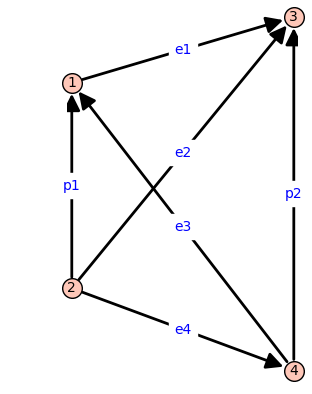

In [43]:
#
# Supply a graph
#
Graph1MyEdges= [(2, 1, p1),(4, 3, p2),(1, 3, e1), (2, 3, e2), (4, 1, e3),(2, 4, e4)  ]
#HA I can label the edges with Ext generators!

Graph1=DiGraph([[1,2,3,4],Graph1MyEdges])

pos_dict = {
 1: [.33, .25],
 2: [.33, 0],
 3: [.6, .33],
 4: [0.6, -.1]}

myplot=Graph1.plot(edge_labels=True,vertex_labels=True,pos=pos_dict,save_pos=True)
myplot.save("K4.pdf")
myplot

In [44]:
#Graph1.edges()

NalFull=Graph1.incidence_matrix(oriented=True, edges=Graph1MyEdges)
                       
NalFull

[ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0]
[ 0 -1  0  0 -1  1]

In [45]:
temp=[i for i in range(r,Graph1.num_verts())]
Nal=NalFull.delete_rows(temp)
assert((Nal.nrows()==r) & (Nal.ncols()==n+p))
Nal

[ 1  0 -1  0  1  0]
[-1  0  0 -1  0 -1]
[ 0  1  1  1  0  0]

In [46]:
latex(Nal)

\left(\begin{array}{rrrrrr}
1 & 0 & -1 & 0 & 1 & 0 \\
-1 & 0 & 0 & -1 & 0 & -1 \\
0 & 1 & 1 & 1 & 0 & 0
\end{array}\right)

In [47]:
NbePe=Nal.right_kernel().basis_matrix()
NbePe

[ 1  0  0  0 -1 -1]
[ 0  1  0 -1  0  1]
[ 0  0  1 -1  1  1]

In [48]:
latex(NbePe)

\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -1 & -1 \\
0 & 1 & 0 & -1 & 0 & 1 \\
0 & 0 & 1 & -1 & 1 & 1
\end{array}\right)

In [49]:
NalG=   Nal  *diagonal_matrix([1 for i in range(0,p)]+Gees)
NbePeR= NbePe*diagonal_matrix([1 for i in range(0,p)]+Rrrs)

In [50]:
latex(NalG)

\left(\begin{array}{rrrrrr}
1 & 0 & -g_{1} & 0 & g_{3} & 0 \\
-1 & 0 & 0 & -g_{2} & 0 & -g_{4} \\
0 & 1 & g_{1} & g_{2} & 0 & 0
\end{array}\right)

In [51]:
NbePeR

[  1   0   0   0 -r3 -r4]
[  0   1   0 -r2   0  r4]
[  0   0  r1 -r2  r3  r4]

In [52]:
latex(NbePeR)

\left(\begin{array}{rrrrrr}
1 & 0 & 0 & 0 & -r_{3} & -r_{4} \\
0 & 1 & 0 & -r_{2} & 0 & r_{4} \\
0 & 0 & r_{1} & -r_{2} & r_{3} & r_{4}
\end{array}\right)

In [53]:
Lal=NalG   * (matrix([Paas+Eees]).transpose());print("Lal:\n",Lal)
Lbe=NbePeR * (matrix([Pbes+Eees]).transpose());print("\nLbe:\n",Lbe)

Lal:
 [ pa1 - g1*e1 + g3*e3]
[-pa1 - g2*e2 - g4*e4]
[ pa2 + g1*e1 + g2*e2]

Lbe:
 [          pb1 - r3*e3 - r4*e4]
[          pb2 - r2*e2 + r4*e4]
[r1*e1 - r2*e2 + r3*e3 + r4*e4]


In [54]:
dictLal=Lal.dict();dictLal

{(0, 0): pa1 - g1*e1 + g3*e3,
 (1, 0): -pa1 - g2*e2 - g4*e4,
 (2, 0): pa2 + g1*e1 + g2*e2}

In [55]:
dictLbe=Lbe.dict();dictLbe

{(0, 0): pb1 - r3*e3 - r4*e4,
 (1, 0): pb2 - r2*e2 + r4*e4,
 (2, 0): r1*e1 - r2*e2 + r3*e3 + r4*e4}

In [56]:
ResAl=1
for i in range(0,r):
    ResAl=ResAl*(dictLal.get((i,0)))
print("ResAl\n")
print(ResAl)
ResBe=1
for i in range(0,cr):
    ResBe=ResBe*(dictLbe.get((i,0)))
print("\nResBe\n")
print(ResBe)
Res=ResAl*ResBe

LLL=Res

#print("final result")
#print(Res)
Reslist=Res.list()
print("\n Res list:\n")
Reslist


ResAl

g1*pa1*pa2*e1 + g2*pa1*pa2*e2 - g3*pa1*pa2*e3 + g4*pa1*pa2*e4 - g1*g3*pa1*e1*e3 + g1*g4*pa1*e1*e4 - g2*g3*pa1*e2*e3 + g2*g4*pa1*e2*e4 + g1*g2*pa2*e1*e2 + g1*g4*pa2*e1*e4 + g2*g3*pa2*e2*e3 - g3*g4*pa2*e3*e4 + g1*g2*g3*e1*e2*e3 - g1*g2*g4*e1*e2*e4 - g1*g3*g4*e1*e3*e4 - g2*g3*g4*e2*e3*e4

ResBe

r1*pb1*pb2*e1 - r2*pb1*pb2*e2 + r3*pb1*pb2*e3 + r4*pb1*pb2*e4 + r1*r2*pb1*e1*e2 - r1*r4*pb1*e1*e4 - r2*r3*pb1*e2*e3 - r3*r4*pb1*e3*e4 - r1*r3*pb2*e1*e3 - r1*r4*pb2*e1*e4 + r2*r3*pb2*e2*e3 + r2*r4*pb2*e2*e4 - r1*r2*r3*e1*e2*e3 - r1*r2*r4*e1*e2*e4 - r1*r3*r4*e1*e3*e4 + r2*r3*r4*e2*e3*e4

 Res list:



[((2, 3, 4, 5, 6, 7), -r2*g1 - r1*g2),
 ((2, 3, 4, 5, 6, 8), r3*g1 + r1*g3),
 ((2, 3, 4, 5, 6, 9), r4*g1 - r1*g4),
 ((2, 3, 4, 5, 7, 8), r3*g2 - r2*g3),
 ((2, 3, 4, 5, 7, 9), r4*g2 + r2*g4),
 ((2, 3, 4, 5, 8, 9), -r4*g3 - r3*g4),
 ((2, 3, 4, 6, 7, 8), r2*r3*g1 + r1*r2*g3),
 ((2, 3, 4, 6, 7, 9), -r1*r4*g2 - r1*r2*g4),
 ((2, 3, 4, 6, 8, 9), r3*r4*g1 + r1*r4*g3),
 ((2, 3, 4, 7, 8, 9), r3*r4*g2 + r2*r3*g4),
 ((2, 3, 5, 6, 7, 8), -r2*r3*g1 - r1*r3*g2),
 ((2, 3, 5, 6, 7, 9), -r2*r4*g1 - r1*r4*g2),
 ((2, 3, 5, 6, 8, 9), r1*r4*g3 + r1*r3*g4),
 ((2, 3, 5, 7, 8, 9), -r2*r4*g3 - r2*r3*g4),
 ((2, 3, 6, 7, 8, 9), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4),
 ((2, 4, 5, 6, 7, 8), -r2*g1*g3 - r1*g2*g3),
 ((2, 4, 5, 6, 7, 9), r2*g1*g4 + r1*g2*g4),
 ((2, 4, 5, 6, 8, 9), -r4*g1*g3 - r3*g1*g4),
 ((2, 4, 5, 7, 8, 9), -r4*g2*g3 - r3*g2*g4),
 ((2, 4, 6, 7, 8, 9), r1*r4*g2*g3 - r2*r3*g1*g4),
 ((2, 5, 6, 7, 8, 9), r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4),
 ((3, 4, 5, 6, 7, 8), r3*g1*g

In [57]:
RESULT=0
for thing in Reslist:
    print(tuple(range(3*p,3*p+n)))
    print("\nTry:",thing[0])
    if thing[0][p:p+n]==tuple(range(3*p,3*p+n)):
        print(" \n", thing)
        prgens=1
        print("\n",thing[0][0:p])
        for i in thing[0][0:p]:
            prgens=prgens*(Ext.gens()[i])
        print(" \nMonomial:", prgens)
        print("Coef:",thing[1])
        term = thing[1]*prgens
#        print(" \n", term)
        RESULT = RESULT + term
#print("\nHERE IT IS:", RESULT)

(6, 7, 8, 9)

Try: (2, 3, 4, 5, 6, 7)
(6, 7, 8, 9)

Try: (2, 3, 4, 5, 6, 8)
(6, 7, 8, 9)

Try: (2, 3, 4, 5, 6, 9)
(6, 7, 8, 9)

Try: (2, 3, 4, 5, 7, 8)
(6, 7, 8, 9)

Try: (2, 3, 4, 5, 7, 9)
(6, 7, 8, 9)

Try: (2, 3, 4, 5, 8, 9)
(6, 7, 8, 9)

Try: (2, 3, 4, 6, 7, 8)
(6, 7, 8, 9)

Try: (2, 3, 4, 6, 7, 9)
(6, 7, 8, 9)

Try: (2, 3, 4, 6, 8, 9)
(6, 7, 8, 9)

Try: (2, 3, 4, 7, 8, 9)
(6, 7, 8, 9)

Try: (2, 3, 5, 6, 7, 8)
(6, 7, 8, 9)

Try: (2, 3, 5, 6, 7, 9)
(6, 7, 8, 9)

Try: (2, 3, 5, 6, 8, 9)
(6, 7, 8, 9)

Try: (2, 3, 5, 7, 8, 9)
(6, 7, 8, 9)

Try: (2, 3, 6, 7, 8, 9)
 
 ((2, 3, 6, 7, 8, 9), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)

 (2, 3)
 
Monomial: pa1*pa2
Coef: r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4
(6, 7, 8, 9)

Try: (2, 4, 5, 6, 7, 8)
(6, 7, 8, 9)

Try: (2, 4, 5, 6, 7, 9)
(6, 7, 8, 9)

Try: (2, 4, 5, 6, 8, 9)
(6, 7, 8, 9)

Try: (2, 4, 5, 7, 8, 9)
(6, 7, 8, 9)

Try: (2, 4, 6, 7, 8, 9)
 
 ((2, 4, 6, 7, 8, 9), r1*r4*g2*g3 - r2*r3*g1*g4)

 (2, 4)
 
Monomial: 

In [58]:
RESULT.list()

[((2, 3), r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4),
 ((2, 4), r1*r4*g2*g3 - r2*r3*g1*g4),
 ((2, 5), r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4),
 ((3, 4), -r3*r4*g1*g2 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r2*g3*g4),
 ((3, 5), -r1*r4*g2*g3 + r2*r3*g1*g4),
 ((4, 5), r4*g1*g2*g3 + r3*g1*g2*g4 + r2*g1*g3*g4 + r1*g2*g3*g4)]

In [59]:
RESULT==GREAT

True

In [60]:
HAPPYMAYBE.extN==RESULT

True

In [61]:
TEST==RESULT

True

In [62]:
LLL

(-r2*g1 - r1*g2)*pa1*pa2*pb1*pb2*e1*e2 + (r3*g1 + r1*g3)*pa1*pa2*pb1*pb2*e1*e3 + (r4*g1 - r1*g4)*pa1*pa2*pb1*pb2*e1*e4 + (r3*g2 - r2*g3)*pa1*pa2*pb1*pb2*e2*e3 + (r4*g2 + r2*g4)*pa1*pa2*pb1*pb2*e2*e4 + (-r4*g3 - r3*g4)*pa1*pa2*pb1*pb2*e3*e4 + (r2*r3*g1 + r1*r2*g3)*pa1*pa2*pb1*e1*e2*e3 + (-r1*r4*g2 - r1*r2*g4)*pa1*pa2*pb1*e1*e2*e4 + (r3*r4*g1 + r1*r4*g3)*pa1*pa2*pb1*e1*e3*e4 + (r3*r4*g2 + r2*r3*g4)*pa1*pa2*pb1*e2*e3*e4 + (-r2*r3*g1 - r1*r3*g2)*pa1*pa2*pb2*e1*e2*e3 + (-r2*r4*g1 - r1*r4*g2)*pa1*pa2*pb2*e1*e2*e4 + (r1*r4*g3 + r1*r3*g4)*pa1*pa2*pb2*e1*e3*e4 + (-r2*r4*g3 - r2*r3*g4)*pa1*pa2*pb2*e2*e3*e4 + (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2*e1*e2*e3*e4 + (-r2*g1*g3 - r1*g2*g3)*pa1*pb1*pb2*e1*e2*e3 + (r2*g1*g4 + r1*g2*g4)*pa1*pb1*pb2*e1*e2*e4 + (-r4*g1*g3 - r3*g1*g4)*pa1*pb1*pb2*e1*e3*e4 + (-r4*g2*g3 - r3*g2*g4)*pa1*pb1*pb2*e2*e3*e4 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1*e1*e2*e3*e4 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2*e1*e2*e3*e4 + (r3*g

In [65]:
LLL

(-r2*g1 - r1*g2)*pa1*pa2*pb1*pb2*e1*e2 + (r3*g1 + r1*g3)*pa1*pa2*pb1*pb2*e1*e3 + (r4*g1 - r1*g4)*pa1*pa2*pb1*pb2*e1*e4 + (r3*g2 - r2*g3)*pa1*pa2*pb1*pb2*e2*e3 + (r4*g2 + r2*g4)*pa1*pa2*pb1*pb2*e2*e4 + (-r4*g3 - r3*g4)*pa1*pa2*pb1*pb2*e3*e4 + (r2*r3*g1 + r1*r2*g3)*pa1*pa2*pb1*e1*e2*e3 + (-r1*r4*g2 - r1*r2*g4)*pa1*pa2*pb1*e1*e2*e4 + (r3*r4*g1 + r1*r4*g3)*pa1*pa2*pb1*e1*e3*e4 + (r3*r4*g2 + r2*r3*g4)*pa1*pa2*pb1*e2*e3*e4 + (-r2*r3*g1 - r1*r3*g2)*pa1*pa2*pb2*e1*e2*e3 + (-r2*r4*g1 - r1*r4*g2)*pa1*pa2*pb2*e1*e2*e4 + (r1*r4*g3 + r1*r3*g4)*pa1*pa2*pb2*e1*e3*e4 + (-r2*r4*g3 - r2*r3*g4)*pa1*pa2*pb2*e2*e3*e4 + (r2*r3*r4*g1 + r1*r3*r4*g2 + r1*r2*r4*g3 + r1*r2*r3*g4)*pa1*pa2*e1*e2*e3*e4 + (-r2*g1*g3 - r1*g2*g3)*pa1*pb1*pb2*e1*e2*e3 + (r2*g1*g4 + r1*g2*g4)*pa1*pb1*pb2*e1*e2*e4 + (-r4*g1*g3 - r3*g1*g4)*pa1*pb1*pb2*e1*e3*e4 + (-r4*g2*g3 - r3*g2*g4)*pa1*pb1*pb2*e2*e3*e4 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa1*pb1*e1*e2*e3*e4 + (r2*r4*g1*g3 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r3*g2*g4)*pa1*pb2*e1*e2*e3*e4 + (r3*g

In [67]:
delete(LLL,e1)

(r3*g2 - r2*g3)*pa1*pa2*pb1*pb2*e2*e3 + (r4*g2 + r2*g4)*pa1*pa2*pb1*pb2*e2*e4 + (-r4*g3 - r3*g4)*pa1*pa2*pb1*pb2*e3*e4 + (r3*r4*g2 + r2*r3*g4)*pa1*pa2*pb1*e2*e3*e4 + (-r2*r4*g3 - r2*r3*g4)*pa1*pa2*pb2*e2*e3*e4 + (-r4*g2*g3 - r3*g2*g4)*pa1*pb1*pb2*e2*e3*e4 + (r4*g2*g3 + r2*g3*g4)*pa2*pb1*pb2*e2*e3*e4

In [68]:
contract(LLL,e1)


(r2*g1 + r1*g2)*pa1*pa2*pb1*pb2*e2 + (-r3*g1 - r1*g3)*pa1*pa2*pb1*pb2*e3 + (-r4*g1 + r1*g4)*pa1*pa2*pb1*pb2*e4 + (r2*r3*g1 + r1*r2*g3)*pa1*pa2*pb1*e2*e3 + (-r1*r4*g2 - r1*r2*g4)*pa1*pa2*pb1*e2*e4 + (r3*r4*g1 + r1*r4*g3)*pa1*pa2*pb1*e3*e4 + (-r2*r3*g1 - r1*r3*g2)*pa1*pa2*pb2*e2*e3 + (-r2*r4*g1 - r1*r4*g2)*pa1*pa2*pb2*e2*e4 + (r1*r4*g3 + r1*r3*g4)*pa1*pa2*pb2*e3*e4 + (-r2*r3*r4*g1 - r1*r3*r4*g2 - r1*r2*r4*g3 - r1*r2*r3*g4)*pa1*pa2*e2*e3*e4 + (-r2*g1*g3 - r1*g2*g3)*pa1*pb1*pb2*e2*e3 + (r2*g1*g4 + r1*g2*g4)*pa1*pb1*pb2*e2*e4 + (-r4*g1*g3 - r3*g1*g4)*pa1*pb1*pb2*e3*e4 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa1*pb1*e2*e3*e4 + (-r2*r4*g1*g3 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r3*g2*g4)*pa1*pb2*e2*e3*e4 + (r3*g1*g2 + r1*g2*g3)*pa2*pb1*pb2*e2*e3 + (r4*g1*g2 + r2*g1*g4)*pa2*pb1*pb2*e2*e4 + (-r3*g1*g4 - r1*g3*g4)*pa2*pb1*pb2*e3*e4 + (r3*r4*g1*g2 + r1*r4*g2*g3 + r2*r3*g1*g4 + r1*r2*g3*g4)*pa2*pb1*e2*e3*e4 + (r1*r4*g2*g3 - r2*r3*g1*g4)*pa2*pb2*e2*e3*e4 + (-r4*g1*g2*g3 - r3*g1*g2*g4 - r2*g1*g3*g4 - r1*g2*g3*g4

In [70]:
delete_contract(LLL,e1)

((r3*g2 - r2*g3)*pa1*pa2*pb1*pb2*e2*e3 + (r4*g2 + r2*g4)*pa1*pa2*pb1*pb2*e2*e4 + (-r4*g3 - r3*g4)*pa1*pa2*pb1*pb2*e3*e4 + (r3*r4*g2 + r2*r3*g4)*pa1*pa2*pb1*e2*e3*e4 + (-r2*r4*g3 - r2*r3*g4)*pa1*pa2*pb2*e2*e3*e4 + (-r4*g2*g3 - r3*g2*g4)*pa1*pb1*pb2*e2*e3*e4 + (r4*g2*g3 + r2*g3*g4)*pa2*pb1*pb2*e2*e3*e4,
 (r2*g1 + r1*g2)*pa1*pa2*pb1*pb2*e2 + (-r3*g1 - r1*g3)*pa1*pa2*pb1*pb2*e3 + (-r4*g1 + r1*g4)*pa1*pa2*pb1*pb2*e4 + (r2*r3*g1 + r1*r2*g3)*pa1*pa2*pb1*e2*e3 + (-r1*r4*g2 - r1*r2*g4)*pa1*pa2*pb1*e2*e4 + (r3*r4*g1 + r1*r4*g3)*pa1*pa2*pb1*e3*e4 + (-r2*r3*g1 - r1*r3*g2)*pa1*pa2*pb2*e2*e3 + (-r2*r4*g1 - r1*r4*g2)*pa1*pa2*pb2*e2*e4 + (r1*r4*g3 + r1*r3*g4)*pa1*pa2*pb2*e3*e4 + (-r2*r3*r4*g1 - r1*r3*r4*g2 - r1*r2*r4*g3 - r1*r2*r3*g4)*pa1*pa2*e2*e3*e4 + (-r2*g1*g3 - r1*g2*g3)*pa1*pb1*pb2*e2*e3 + (r2*g1*g4 + r1*g2*g4)*pa1*pb1*pb2*e2*e4 + (-r4*g1*g3 - r3*g1*g4)*pa1*pb1*pb2*e3*e4 + (-r1*r4*g2*g3 + r2*r3*g1*g4)*pa1*pb1*e2*e3*e4 + (-r2*r4*g1*g3 - r1*r4*g2*g3 - r2*r3*g1*g4 - r1*r3*g2*g4)*pa1*pb2*e2*e3*e4 + 